<a href="https://colab.research.google.com/github/StillWork/AIDD-LAIDD/blob/main/z4_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 이해

- MLP(Multi Layer Perceptron)와 CNN(Convolution Neural Network) 이해

## 딥러닝 모델 유형

 <img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-22%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%202.55.58.png?raw=1" align="left">

## 신경망의 특징
- 60년대부터 가능성을 연구하였으나 오랫동안 성과를 내지 못했다
 - 학습이 어렵고, 계산량이 많고, 과대적합이 많고, 블랙박스 동작
 - 지금은 이러한 문제들이, 데이터의 증가, 알고리즘의 발달(공개 SW), 하드웨어 계산능력의 증대로 해결되었다
- small 데이터에 대해서는 전통적인 머신러닝 모델 (RF, SVM 등)을 사용해도 과대적합도 적게 발생하고 잘 동작했다
- 2012년 Imagenet 경진대회에서 CNN 기반의 신경망이 매우 우수한 성적을 내면서 딥러닝 모델이 확산되었다
- 자연어 처리분야에서는 2014년 word2vec(단어 임베딩)의 도입으로 성능이 크게 향상되었다
 - 비슷한 의미를 갖는 단어는 비슷한 표현형을 갖게 함
 - 자연어 처리에서는 초기에는 RNN을 사용했으나 현재는 Transformer를 사용한다

## Feature Learning 

- Feature Engineering은 사람이 전문성을 가지고 중요한 특성을 만드는 것이고, Feature Learning은 신경망이 학습을 통해서 스스로 머신러닝에 필요한 특성을 만들어내는 것이다
- 아래 그림에서 좌측은 Feature Engineering, 우측은 Feature Learning을 나타냈다

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-22%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.15.35.png?raw=1"  align="left">

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-22%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.16.20.png?raw=1"  align="left">

## 신약개발에 신경망 도입
- 2012년 Merck Molecular Activity Challenge 대회에서 신경망 모델이 RF 모델보다 월등히 높은 성능을 냈다
 - 15개의 태스크에 대해 바이오 활동성을 예측하는 문제
 - 이후 QSAR, 분자의 특성 예측, ADME 예측 등 신약개발에 신경망이 적극 도입되기 시작했다

# import

In [4]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 32.4 MB/s 
     |████████████████████████████████| 29.1 MB 1.4 MB/s 


In [5]:
import deepchem as dc
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models

# MLP
- Multi Layer Perceptron

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.48.10.png?raw=1" width="600"  align="left">

## Fringerprint를 사용한 독성 예측 예

- MLP 모델을 사용 (한개의 히든 계층 사용)
- 12개의 이진 분류 태스크를 수행
- auc와 accuracy를 측정

In [6]:
tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets
print(train_dataset)

<DiskDataset X.shape: (6264, 1024), y.shape: (6264, 12), w.shape: (6264, 12), task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>


In [7]:
tasks

['NR-AR',
 'NR-AR-LBD',
 'NR-AhR',
 'NR-Aromatase',
 'NR-ER',
 'NR-ER-LBD',
 'NR-PPAR-gamma',
 'SR-ARE',
 'SR-ATAD5',
 'SR-HSE',
 'SR-MMP',
 'SR-p53']

In [9]:
train_dataset.X.shape

(6264, 1024)

In [10]:
train_dataset.y.shape

(6264, 12)

In [11]:
train_dataset.w

array([[1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 1.17464996,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 1.17464996,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 0.        ,
        1.05288369],
       ...,
       [1.04502242, 0.        , 1.12502653, ..., 1.05576503, 6.7257384 ,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 6.7257384 ,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 0.        , 1.17464996,
        1.05288369]])

- `y`의 모양이 (6264, 12)이며 이는 12가지의 멀티태스크가 있음을 나타낸다
- w (가중치)의 의미
 - 이 값이 0이면 결측치를 나타낸다. 해당 샘플에 대해서는 손실함수나 성능평가 시에 무시하도록 한다
 - 이 값은 대부분의 경우 1 또는 1 근처의 값을 갖는다
 - 이 값은 각 태스크별로 레이블 분포의 불균형을 보완하기 위해서 사용된다
 - 12개 태스크가 균등하게 성능에 기여하도록 조정하는데 사용된다.


## 모델 구현 및 성능 평가

- MLP를 구형하기 위해서 deepchem이 제공하는 MultitaskClassifier()를 사용한다

In [12]:
model = dc.models.MultitaskClassifier(n_tasks=12, n_features=1024, layer_sizes=[1000])
model.fit(train_dataset, nb_epoch=20)
metric1 = dc.metrics.Metric(dc.metrics.roc_auc_score)
metric2 = dc.metrics.Metric(dc.metrics.accuracy_score)
print('training set score:', model.evaluate(train_dataset, [metric1, metric2], transformers))
print('test set score:', model.evaluate(test_dataset, [metric1, metric2], transformers))

training set score: {'roc_auc_score': 0.9744991919677557, 'accuracy_score': 0.9198329076202638}
test set score: {'roc_auc_score': 0.6722453354772858, 'accuracy_score': 0.8363095238095238}


# CNN

- MNIST 숫자 이미지를 판독하는 문제
- MNIST 데이터

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-21%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.58.30.png?raw=1" width="700"  align="left">


## 데이터 전처리

- 데이터 다운로드

11490434/11490434 [==============================] - 2s 0us/step


<function matplotlib.pyplot.show(*args, **kw)>

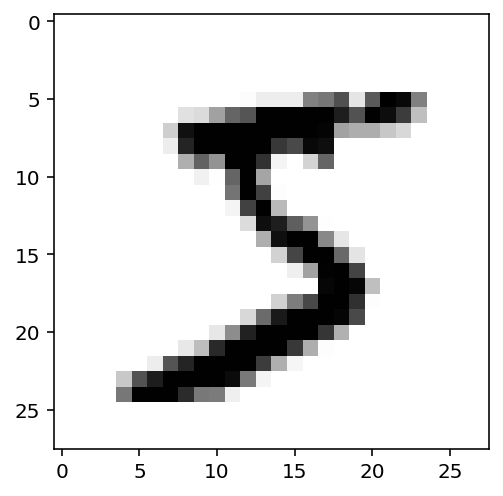

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_labels[:3]

array([5, 0, 4], dtype=uint8)

## input 데이터 reshape

- CNN의 입력은 (sample, shape(28x28), feature)과 같은 모양으로 만들어주어야 2차원 데이터인지 알 수 있다
 - 맨 앞은 샘플을 구분하고, 맨 뒤는 feature를 구분하는데 사용하며 중간이 모양을 보고 2차원인지 알 수 있다
 - (샘플, 행, 열, 특성)


In [20]:
X_train_cnn = train_images.reshape(-1,28,28,1)/255.
X_test_cnn = test_images.reshape(-1,28,28,1)/255.

y_train_cat = to_categorical(train_labels)
y_test_cat = to_categorical(test_labels)

In [21]:
y_train_cat[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 모델 구현


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-23%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.40.48.png?raw=1" align="left">

In [22]:
from keras import layers
from keras import models

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', 
                    padding="same", input_shape = (28, 28,1)))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(32, (3,3), 
                    padding="same", activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64, (3,3), 
                    padding="same", activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64, (3,3), 
                    padding="same", activation='relu'))

model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [24]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]

model_cnn.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# 최적화 알고리즘으로 'adam'과 'rmsprop'이 널리 사용된다
h = model_cnn.fit(X_train_cnn,
                      y_train_cat,
                      batch_size=20,
                      epochs=3,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/3
2400/2400 [==============================] - 16s 6ms/step - loss: 0.0310 - accuracy: 0.9909 - val_loss: 0.0412 - val_accuracy: 0.9889
Epoch 2/3
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0537 - val_accuracy: 0.9847
Epoch 3/3
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0554 - val_accuracy: 0.9861


In [27]:
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0619 - accuracy: 0.9859
test_acc =  0.9858999848365784
